 Importações e configuração

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


Carregamento e pré-processamento dos dados

In [3]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    '../dataset/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '../dataset/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)



Found 960 images belonging to 8 classes.
Found 233 images belonging to 8 classes.


 Construção do modelo

In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/home/tailan/Documentos/6 Semestre/Aprendizado de Maquina/TrabPlanetas/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-01 14:36:33.815115: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Treinamento

In [5]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

model.save('../model/planet_model.keras')


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 391ms/step - accuracy: 0.6865 - loss: 0.8660 - val_accuracy: 0.9313 - val_loss: 0.2557
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 375ms/step - accuracy: 0.9656 - loss: 0.1237 - val_accuracy: 0.9056 - val_loss: 0.4675
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 400ms/step - accuracy: 0.9802 - loss: 0.0706 - val_accuracy: 0.9571 - val_loss: 0.1487
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 396ms/step - accuracy: 0.9937 - loss: 0.0239 - val_accuracy: 0.9871 - val_loss: 0.0642
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 400ms/step - accuracy: 0.9917 - loss: 0.0323 - val_accuracy: 0.9056 - val_loss: 0.4403
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 364ms/step - accuracy: 0.9781 - loss: 0.0601 - val_accuracy: 0.9227 - val_loss: 0.2005
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 382ms/step - accuracy: 0.9792 - loss: 0.0727 - val_accuracy: 0.9099 - val_loss: 0.2186
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 384ms/step - accuracy: 0.9958 - loss: 0.0218 - val_accu

Avaliação

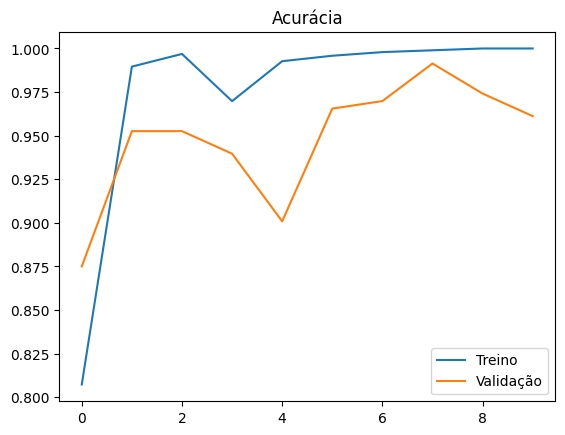

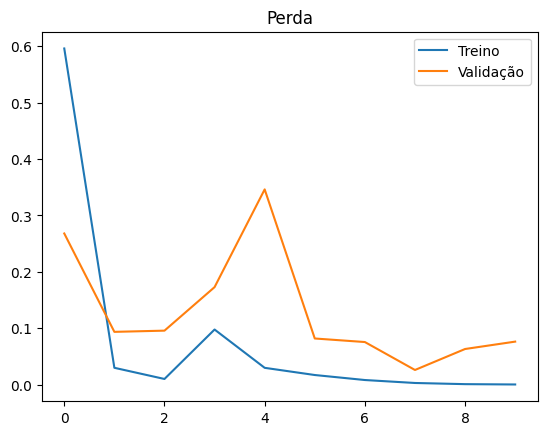

In [19]:
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.legend()
plt.title('Acurácia')
plt.show()

plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.legend()
plt.title('Perda')
plt.show()


In [1]:
from tensorflow.keras.preprocessing import image
import numpy as np

model = load_model('../model/planet_model.keras')
class_names = list(train_generator.class_indices.keys())

img = image.load_img('../dataset/train/mars/ola.jpeg', target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("Planeta previsto:", class_names[np.argmax(prediction)])


2025-11-01 14:36:19.386810: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-01 14:36:19.443018: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-01 14:36:20.965106: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


NameError: name 'load_model' is not defined

Found 1193 images belonging to 8 classes.
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step


/home/tailan/Documentos/6 Semestre/Aprendizado de Maquina/TrabPlanetas/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


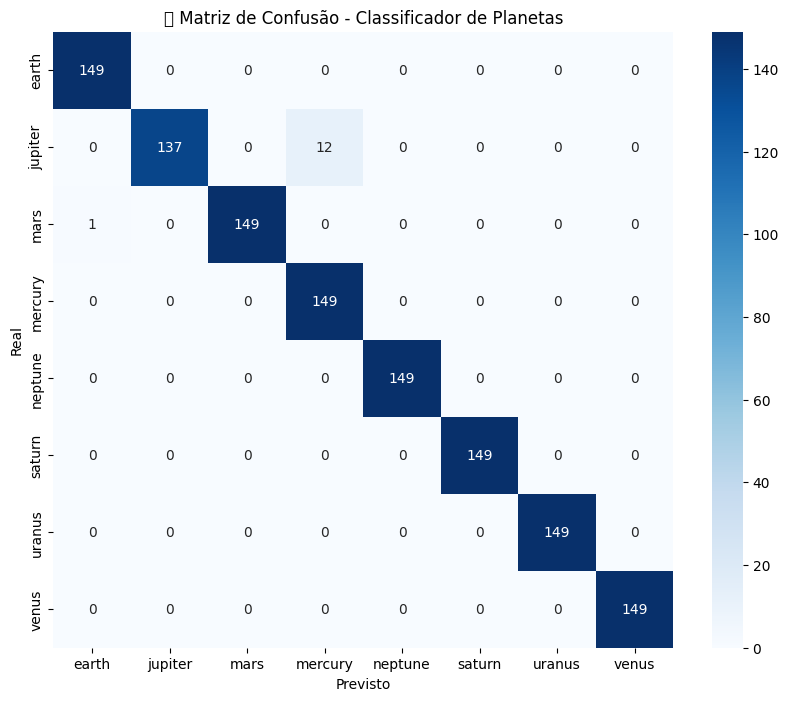

              precision    recall  f1-score   support

       earth       0.99      1.00      1.00       149
     jupiter       1.00      0.92      0.96       149
        mars       1.00      0.99      1.00       150
     mercury       0.93      1.00      0.96       149
     neptune       1.00      1.00      1.00       149
      saturn       1.00      1.00      1.00       149
      uranus       1.00      1.00      1.00       149
       venus       1.00      1.00      1.00       149

    accuracy                           0.99      1193
   macro avg       0.99      0.99      0.99      1193
weighted avg       0.99      0.99      0.99      1193



In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

model = load_model('../model/planet_model.keras')  # ou .h5

IMG_SIZE = (128, 128)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '../dataset/train',  # ou '../dataset/test' se tiver imagens separadas
    target_size=IMG_SIZE,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('🔍 Matriz de Confusão - Classificador de Planetas')
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))
